<a href="https://colab.research.google.com/github/PranayChavhan/DBMS_Practical/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSBDL Assignment 01 - Data Wrangling 1

Perform the following operations using Python on any open-source dataset (e.g., data.csv)

1. Import all the required Python Libraries.
2. Locate an open-source data from the web (e.g. https://www.kaggle.com). Provide a clear description of the data and its source (i.e., URL of the web site).
3. Load the Dataset into pandas’ data frame.
4. Data Preprocessing: check for missing values in the data using pandas isnull (), describe() function to get some initial statistics. Provide variable descriptions. Types of variables etc. Check the dimensions of the data frame.
5. Data Formatting and Data Normalization: Summarize the types of variables by checking the data types (i.e., character, numeric, integer, factor, and logical) of the variables in the data set. If variables are not in the correct data type, apply proper type conversions.
6. Turn categorical variables into quantitative variables in Python.

In addition to the codes and outputs, explain every operation that you do in the above steps and
explain everything that you do to import/read/scrape the data set.



## 1. Import all Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Locate an open-source dataset

Source: https://archive.ics.uci.edu/dataset/2/adult

> Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.


- Dataset Characteristics: `Multivariate`
- Subject Area: `Social Science`
- Associated Tasks: `Classification`
- Feature Type: `Categorical, Integer`
- Instances: `48842`
- Number of features: `14`

## 3. Load dataset in Pandas DataFrame

In [2]:
cols = [
    "age" , "workclass" , "fnlwgt" ,
    "education" , "education-num" , "marital-status" ,
    "occupation" , "relationship" , "race" , "sex" ,
    "capital-gain" , "capital-loss" , "hours-per-week" ,
    "native-country" , "income"
]
ds = pd.read_csv( "dataset/adult.data" , header=None , skipinitialspace=True )
ds.columns = cols

# Change dtypes from `object` to `str`
ds = ds.astype( {
    "workclass": 'string' , "education": 'string' , "marital-status": 'string' , "occupation": 'string' ,
    "relationship": 'string' ,
    "race": 'string' , "sex": 'string' , "native-country": 'string' , "income": 'string'
} )

ds.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## 4. Data Preprocessing

### 4.1. Check dimensions of data frame

In [3]:
# Dimensions of dataframe
ds.shape

(32561, 15)

### 4.2. Check data types of all features

In [4]:
# Data-types of all columns
ds.dtypes

age                int64
workclass         string
fnlwgt             int64
education         string
education-num      int64
marital-status    string
occupation        string
relationship      string
race              string
sex               string
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    string
income            string
dtype: object

### 4.3. Use `.describe` to get statistics for numeric features

In [5]:
# Initial description of numerical columns in the dataset
ds.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

### 4.4. Check number of missing values for all features

In [6]:
# Check for missing values in all columns of the dataset
ds.isin( [ "?" ] ).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### 4.5. Provide variable descriptions

1. `age`: Age of the person
2. `workclass`: Working class of the person
3. `fnlwgt`:
4. `education`: Education level of the person
5. `education-num`: Quantitative feature for `education`
6. `marital-status`: Marital status of the person
7. `occupation`: Occupation of the person
8. `relationship`:
9. `race`: Race of the person
10. `sex`: Sex/gender of the person
11. `capital-gain`:
12. `capital-loss`:
13. `hours-per-week`:
14. `native-country`:

In [7]:
def plot_value_counts(
    name: str ,
    ds: pd.DataFrame
):
    value_counts = ds[ name ].value_counts()
    entities = value_counts.index.tolist()
    freqs = value_counts.values.tolist()
    plt.title( name )
    plt.xticks( rotation='vertical' )
    plt.bar( entities , freqs )
    plt.show()

## 5. Data Formatting and Normalization


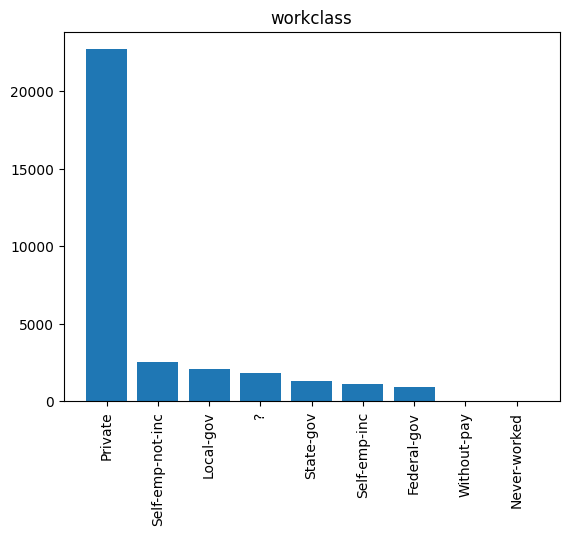

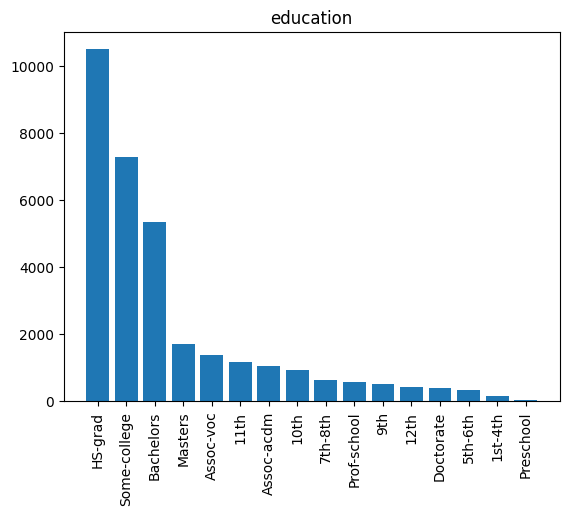

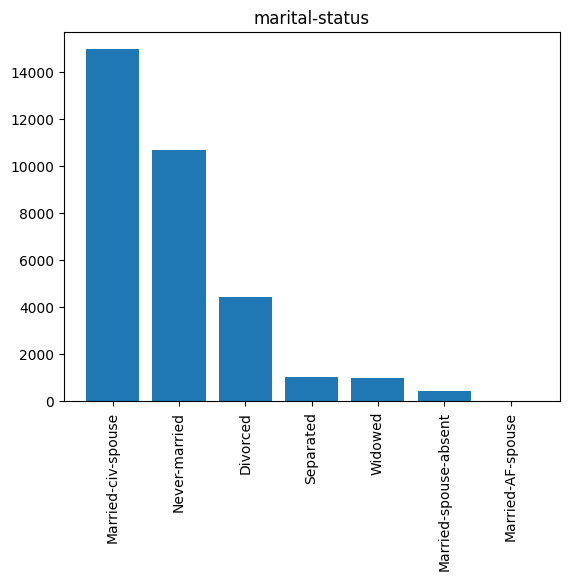

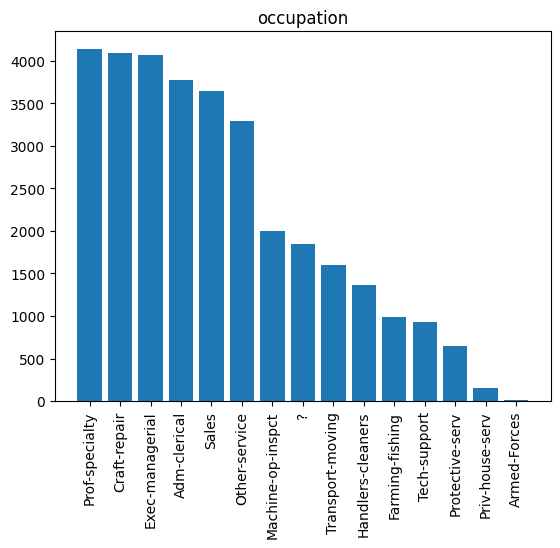

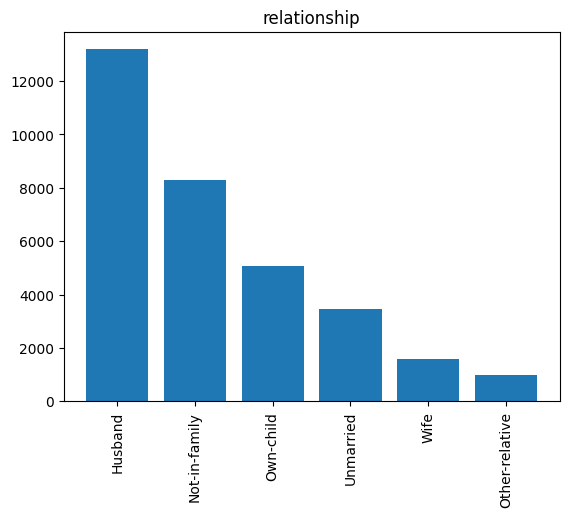

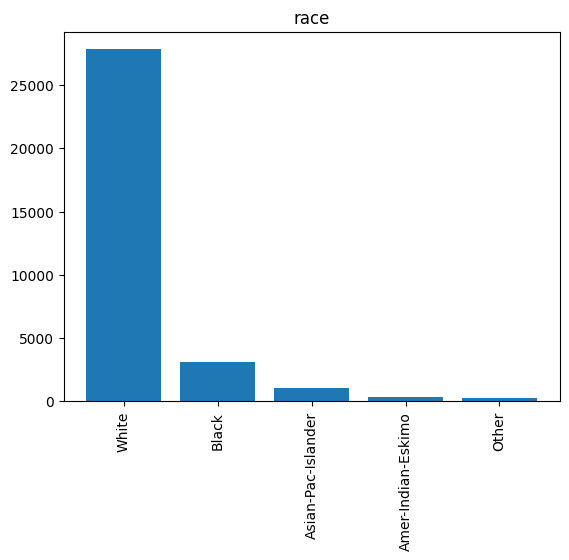

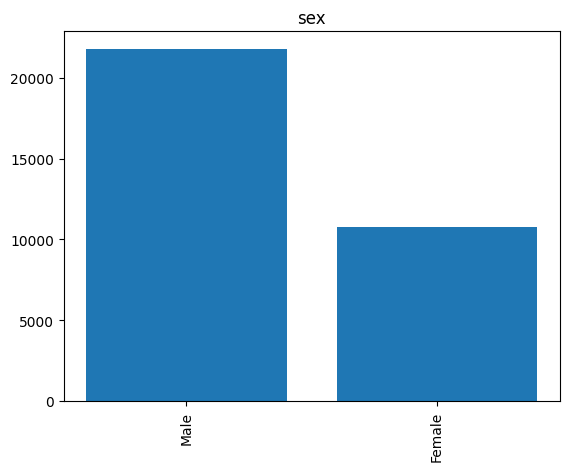

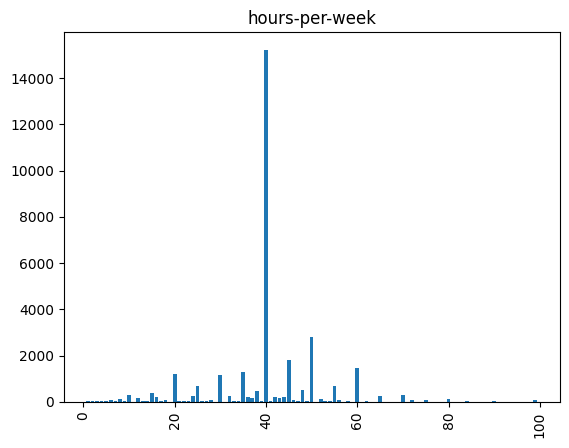

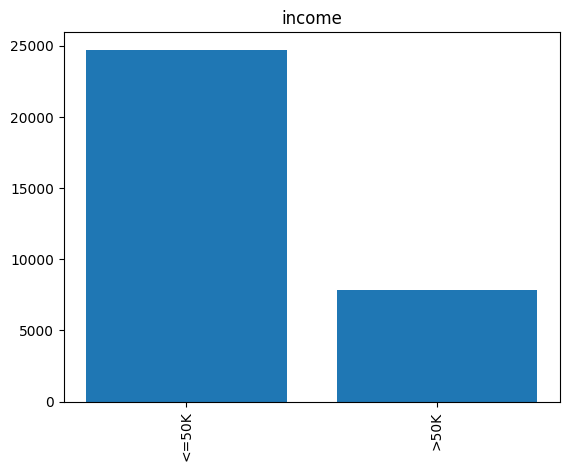

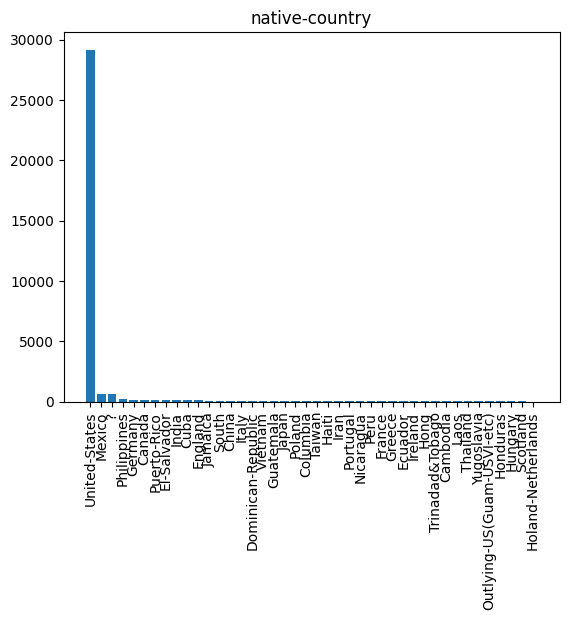

In [8]:
# Plot value counts for all discrete features
plot_value_counts( "workclass" , ds )
plot_value_counts( "education" , ds )
plot_value_counts( "marital-status" , ds )
plot_value_counts( "occupation" , ds )
plot_value_counts( "relationship" , ds )
plot_value_counts( "race" , ds )
plot_value_counts( "sex" , ds )
plot_value_counts( "hours-per-week" , ds )
plot_value_counts( "income" , ds )
plot_value_counts( "native-country" , ds )

## 5.1. Handle missing values


### 5.1.1. Change missing values of `workclass` with mode of the feature

In [9]:
feature = ds.workclass
feature_values = feature.value_counts()
mode_feature = feature_values.index.tolist()[ feature_values.argmax() ]
ds.loc[ feature == "?" , "workclass" ] = mode_feature

### 5.1.2. Remove records with unknown `occupation`

In [10]:
ds = ds.loc[ ds.occupation != "?" ]

### 5.1.3. Change missing values of `native-country` with mode of the feature

In [11]:
feature = ds[ "native-country" ]
feature_values = feature.value_counts()
mode_feature = feature_values.index.tolist()[ feature_values.argmax() ]
ds.loc[ feature == "?" , "native-country" ] = mode_feature

## 5.2 Data Normalization

In [12]:
def min_max_normalize(
    name: str
):
    ds[ name ] = (ds[ name ] - ds[ name ].min()) / ( ds[ name ].max() - ds[ name ].min() )

In [13]:
min_max_normalize( "age" )
min_max_normalize( "fnlwgt" )
min_max_normalize( "capital-gain" )
min_max_normalize( "capital-loss" )
min_max_normalize( "hours-per-week" )

## 6. Categorical variables to quantitative variables

### 6.1. Encoding `sex` into a binary feature (not good though)

In [14]:
ds.loc[ ds.sex == "Male" , "sex" ] = '0'
ds.loc[ ds.sex == "Female" , "sex" ] = '1'
ds.sex = pd.to_numeric( ds.sex )

### 6.2. Encoding `income` into a binary feature

In [15]:
ds.loc[ ds.income == ">50K" , "income" ] = '0'
ds.loc[ ds.income == "<=50K" , "income" ] = '1'
ds.income = pd.to_numeric( ds.income )

### 6.3. Encoding other categorical feature


In [16]:
def label_encoding(
    feature_name: str
):
    feature_values = ds[ feature_name ].unique().tolist()
    for i , feature_value in enumerate( feature_values ):
        ds.loc[ ds[ feature_name ] == feature_value , feature_name ] = str( i )
    ds[ feature_name ] = pd.to_numeric( ds[ feature_name ] )

# label_encoding( "race" )
label_encoding( "workclass" )
label_encoding( "marital-status" )
label_encoding( "occupation" )
label_encoding( "relationship" )
label_encoding( "native-country" )

In [17]:
ds = ds.drop( [ "education" ] , axis=1 )
ds = ds.rename( { "education-num": "education" } )

In [18]:
ds

age  workclass    fnlwgt  education-num  marital-status  \
0      0.301370          0  0.043338             13               0   
1      0.452055          1  0.047277             13               1   
2      0.287671          2  0.137244              9               2   
3      0.493151          2  0.150212              7               1   
4      0.150685          2  0.220703             13               1   
...         ...        ...       ...            ...             ...   
32556  0.136986          2  0.165563             12               1   
32557  0.315068          2  0.095589              9               1   
32558  0.561644          2  0.093914              9               6   
32559  0.068493          2  0.127620              9               0   
32560  0.479452          5  0.186383              9               1   

       occupation  relationship   race  sex  capital-gain  capital-loss  \
0               0             0  White    0      0.021740           0.0   
1               1             1  White    0      0.000000           0.0   
2               2             0  White    0      0.000000           0.0   
3               2             1  Black    0      0.000000           0.0   
4               3             2  Black    1      0.000000           0.0   
...           ...           ...    ...  ...           ...           ...   
32556          10             2  White    1      0.000000           0.0   
32557           9             1  White    0      0.000000           0.0   
32558           0             4  White    1      0.000000           0.0   
32559           0             3  White    0      0.000000           0.0   
32560           1             2  White    1      0.150242           0.0   

       hours-per-week  native-country  income  
0            0.397959               0       1  
1            0.122449               0       1  
2            0.397959               0       1  
3            0.397959               0       1  
4            0.397959               1       1  
...               ...             ...     ...  
32556        0.377551               0       1  
32557        0.397959               0       0  
32558        0.397959               0       1  
32559        0.193878               0       1  
32560        0.397959               0       0  

[30718 rows x 14 columns]